In [1]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

In [2]:
import gzip
import json
import pandas as pd

In [3]:
df = pd.read_json('AMAZON_FASHION.json.gz', lines=True, compression='gzip')
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,NaN,NaN
1,2,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3.0,NaN,NaN
2,4,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,NaN,NaN,NaN
3,2,True,"08 24, 2014",A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400,NaN,NaN,NaN
4,3,False,"07 27, 2014",A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200,NaN,NaN,NaN


In [4]:
df.shape

(883636, 12)

In [5]:
# remove duplicate reviews
df = df[~df.astype(str).duplicated(df.columns.drop(['asin','vote','style']))]
df.shape

(853805, 12)

In [6]:
# drop rows with nan value for review
df = df.dropna(subset=['reviewText'])
df.shape

(852636, 12)

In [7]:
# pd.set_option('display.max_colwidth', None)

<h1>Text Wrangling & Preprocessing</h1>

In [8]:
import numpy as np
%aimport preprocessing
from preprocessing import text_preprocessing
from preprocessing import apply_preprocessing
import time

In [9]:
# from multiprocessing import Pool

# def parallelize_dataframe(df, func, n_cores=8):
#     '''parallel processing using multiple cores'''
#     if __name__ ==  '__main__':
#         df_split = np.array_split(df, n_cores)
#         pool = Pool(n_cores, maxtasksperchild=10000)
#         output = pool.imap(func, df_split)
#         pool.close()
#         pool.join()
#         return pd.concat(output)
#     else:
#         print('error')

In [10]:
# df['reviewText'] = df['reviewText'].astype(str)
# df = parallelize_dataframe(df, apply_preprocessing)

In [11]:
from joblib import Parallel, delayed
from tqdm import tqdm

# n_jobs is the number of parallel jobs
r = Parallel(n_jobs=8)(delayed(text_preprocessing)(review) for review in tqdm(df['reviewText']))

  0%|▏                                                                        | 2760/852636 [01:08<1:47:05, 132.26it/s]C:\Users\Billy\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
100%|████████████████████████████████████████████████████████████████████████| 852636/852636 [2:56:00<00:00, 80.74it/s]


In [12]:
reviews, words = zip(*r)
df['reviewClean_sw'] = reviews
df['noun_adjective'] = words

df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,reviewClean_sw,noun_adjective
0,5,True,"10 20, 2014",A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,NaN,NaN,"[exactly, what, i, need, .]",[]
1,2,True,"09 28, 2014",A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3.0,NaN,NaN,"[i, agree, with, the, other, review, ,, the, o...","[other, review, opening, small, hook, expensiv..."
2,4,False,"08 25, 2014",A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,NaN,NaN,NaN,"[love, these, ..., i, be, go, to, order, anoth...","[pack, work, someone, back, earring, fish, hoo..."
3,2,True,"08 24, 2014",A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400,NaN,NaN,NaN,"[too, tiny, an, opening]","[tiny, opening]"
4,3,False,"07 27, 2014",A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200,NaN,NaN,NaN,[okay],[]


In [125]:
import string
from spacy.lang.en.stop_words import STOP_WORDS

punctuations = list(string.punctuation)

def remove_stop_punc(tokens):
    reviewClean = []
    for token in tokens:
        if token not in STOP_WORDS and token not in punctuations:
            reviewClean.append(token)
        if token in ['no', 'not']:
            reviewClean.append(token)
        else:
            pass
    return reviewClean

In [126]:
from tqdm import tqdm

tqdm.pandas()
df['reviewClean'] = df['reviewClean_sw'].progress_apply(remove_stop_punc)

df.head()

C:\Users\Billy\anaconda3\lib\site-packages\tqdm\std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████████████████████████████████████████████████████████████████| 852589/852589 [00:08<00:00, 104088.70it/s]


,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,reviewClean_sw,noun_adjective,reviewClean,removeNo,reviewLength,sentiment,year
0,5,True,2014-10-20,A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,NaN,NaN,"[exactly, what, i, need, .]",[],"[exactly, need]","[exactly, need, .]",5,Positive,2014
1,2,True,2014-09-28,A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3.0,NaN,NaN,"[i, agree, with, the, other, review, ,, the, o...","[other, review, opening, small, hook, expensiv...","[agree, review, opening, small, bend, hook, ex...","[agree, review, ,, opening, small, ., bend, ho...",52,Negative,2014
2,4,False,2014-08-25,A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,NaN,NaN,NaN,"[love, these, ..., i, be, go, to, order, anoth...","[pack, work, someone, back, earring, fish, hoo...","[love, ..., order, pack, work, include, lose, ...","[love, ..., order, pack, work, ;, (, include, ...",54,Positive,2014
3,2,True,2014-08-24,A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400,NaN,NaN,NaN,"[too, tiny, an, opening]","[tiny, opening]","[tiny, opening]","[tiny, opening]",4,Negative,2014
4,3,False,2014-07-27,A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200,NaN,NaN,NaN,[okay],[],[okay],[okay],1,Neutral,2014


In [127]:
# drop rows with empty lists for tokenized reviews
df = df[df.reviewClean_sw.str.len() != 0]

In [128]:
df.shape

(852589, 19)

In [129]:
df.to_csv('data_wrangling.csv', index=False)

<h1>EDA on Text Data</h1>

In [130]:
products = pd.read_json('meta_AMAZON_FASHION.json.gz', lines=True, compression='gzip')
products.head()

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,[],,[],,Dante's Peak - Laserdisc,[],[],,,"[<span class=""a-text-bold"">Package Dimensions:...","16,714,561 in Clothing, Shoes & Jewelry (",[],{},"<img src=""https://images-na.ssl-images-amazon....",,"<div class=""a-fixed-left-grid a-spacing-none"">...",,630456984X
1,[],,[],,Milliongadgets(TM) Earring Safety Backs For Fi...,[],[https://images-na.ssl-images-amazon.com/image...,,,"[<span class=""a-text-bold"">ASIN:\n ...","2,081,098 in Clothing, Shoes & Jewelry (",[],{},"<img src=""https://images-na.ssl-images-amazon....",,fishhook,,7106116521
2,[],,[Educating the next generation in the responsi...,,Envirosax Kids Series Jessie &amp; Lulu,[],[],,Envirosax,"[<span class=""a-text-bold"">Product Dimensions:...","25,698,912 in Clothing, Shoes & Jewelry (",[],{},"<img src=""https://images-na.ssl-images-amazon....",,"<div class=""a-fixed-left-grid a-spacing-none"">...",,8037200124
3,[],,[Envirosax Greengrocer - a range of plain colo...,,Envirosax Greengrocer Series Bag 7 Guava,[],[],,Envirosax,"[<span class=""a-text-bold"">Product Dimensions:...","25,850,143 in Clothing, Shoes & Jewelry (",[],{},"<img src=""https://images-na.ssl-images-amazon....",,"<div class=""a-fixed-left-grid a-spacing-none"">...",,8037200221
4,[],,[],,Blessed by Pope Benedetto XVI Our Lady of Guad...,[],[],,Gifts by Lulee,"[<span class=""a-text-bold"">Package Dimensions:...","19,411,377 in Clothing, Shoes & Jewelry (",[],{},"<img src=""https://images-na.ssl-images-amazon....",,"<div class=""a-fixed-left-grid a-spacing-none"">...",,8279996567


In [131]:
products.shape

(186627, 18)

In [132]:
# remove duplciate products
products = products[~products.astype(str).duplicated()]
products.shape

(186184, 18)

In [133]:
def remove_no(text):
    '''remove 'no' and 'not' from text'''
    return [word for word in text if word not in ['no', 'not']]

In [134]:
# remove no and not for text visualization
df['removeNo'] = df['reviewClean'].apply(remove_no)
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,reviewClean_sw,noun_adjective,reviewClean,removeNo,reviewLength,sentiment,year
0,5,True,2014-10-20,A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,NaN,NaN,"[exactly, what, i, need, .]",[],"[exactly, need]","[exactly, need]",5,Positive,2014
1,2,True,2014-09-28,A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3.0,NaN,NaN,"[i, agree, with, the, other, review, ,, the, o...","[other, review, opening, small, hook, expensiv...","[agree, review, opening, small, bend, hook, ex...","[agree, review, opening, small, bend, hook, ex...",52,Negative,2014
2,4,False,2014-08-25,A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,NaN,NaN,NaN,"[love, these, ..., i, be, go, to, order, anoth...","[pack, work, someone, back, earring, fish, hoo...","[love, ..., order, pack, work, include, lose, ...","[love, ..., order, pack, work, include, lose, ...",54,Positive,2014
3,2,True,2014-08-24,A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400,NaN,NaN,NaN,"[too, tiny, an, opening]","[tiny, opening]","[tiny, opening]","[tiny, opening]",4,Negative,2014
4,3,False,2014-07-27,A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200,NaN,NaN,NaN,[okay],[],[okay],[okay],1,Neutral,2014


**Review Word Clouds**

In [135]:
# group by products and combine reviews
df_grouped=df[['asin','removeNo']].groupby('asin').sum()
df_grouped.head()

,removeNo
asin,
0764443682,"[group, excellent, job, vbs, hesitate, purchas..."
1291691480,"[buy, brother, love, sooooo, picky, like, good]"
1940280001,"[book, include, great, routine, great, perform..."
1940735033,"[receive, review, copy, eric, endersons, ash, ..."
1940967805,"[aether, empire, series, comic, book, good, cr..."


In [136]:
def convert_list_to_string(org_list, seperator=' '):
    """ Convert list to string, by joining all item in list with given separator.
        Returns the concatenated string """
    return seperator.join(org_list)

In [137]:
# convert processed reviews from lists to strings for count vectorizer
df_grouped['removeNo'] = df_grouped['removeNo'].apply(convert_list_to_string)
df_grouped.head()

,removeNo
asin,
0764443682,group excellent job vbs hesitate purchase item...
1291691480,buy brother love sooooo picky like good
1940280001,book include great routine great performer sit...
1940735033,receive review copy eric endersons ash ashe or...
1940967805,aether empire series comic book good creative ...


In [138]:
# get indices for the top 5 products with longest reviews
indices = df_grouped['removeNo'].str.split().str.len().nlargest(n=5, keep='all').index
wordcloud = df_grouped.loc[indices]
wordcloud

,removeNo
asin,
B000KPIHQ4,good price good product howver generic need or...
B00I0VHS10,amazing fit love quality great gym yoga super ...
B00RLSCLJM,reason buy 300 dollar ring ring build like tan...
B005N7YWX6,pick bellaband wife 7 week pretty wear day blo...
B00GXE331K,order check quality practicality stainless ste...


In [139]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
count_vector = cv.fit_transform(wordcloud['removeNo'])

In [140]:
# document term matrix for the top 5 products
df_dtm = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names())
df_dtm.index = wordcloud.index.map(products.set_index('asin')['title'])
df_dtm.head()

,00,000,007,02,0493,05,0520252,10,100,1000,...,zipper,zippered,zipping,zippo,zippy,zirconia,zobha,zoo,zumba,zumbathon
asin,,,,,,,,,,,,,,,,,,,,,
Powerstep Pinnacle Orthotic Shoe Insoles,25,2,0,0,0,0,0,121,16,0,...,0,0,0,0,0,0,0,0,4,0
90 Degree By Reflex Power Flex Yoga Capri &ndash; Cationic Heather Activewear Pants,5,0,0,2,0,0,0,68,34,0,...,3,0,0,0,0,0,1,0,10,1
MJ Metals Jewelry 2mm to 10mm White Tungsten Carbide Mirror Polished Classic Wedding Ring,9,2,0,0,0,0,0,60,24,3,...,0,0,0,0,1,2,0,0,0,0
Ingrid &amp; Isabel Women's Maternity Everyday Bellaband,3,0,0,0,0,0,0,57,10,0,...,86,3,1,0,0,0,0,1,2,0
Best RFID Blocking Card Holder Case for Men and Women Slim Stainless Steel Metal Wallet,2,0,1,0,1,1,1,18,12,0,...,0,1,0,5,0,0,0,1,0,0


In [141]:
from wordcloud import WordCloud
from textwrap import wrap
import matplotlib.pyplot as plt

# Function for generating word clouds
def generate_wordcloud(data, title):
  wc = WordCloud(width=400, height=330, max_words=150, colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis('off')
  plt.title('\n'.join(wrap(title,60)), fontsize=13)
  plt.show()

In [142]:
# Transposing document term matrix
df_dtm=df_dtm.transpose()
df_dtm.head()

asin,Powerstep Pinnacle Orthotic Shoe Insoles,90 Degree By Reflex Power Flex Yoga Capri &ndash; Cationic Heather Activewear Pants,MJ Metals Jewelry 2mm to 10mm White Tungsten Carbide Mirror Polished Classic Wedding Ring,Ingrid &amp; Isabel Women's Maternity Everyday Bellaband,Best RFID Blocking Card Holder Case for Men and Women Slim Stainless Steel Metal Wallet
00,25,5,9,3,2
000,2,0,2,0,0
007,0,0,0,0,1
02,0,2,0,0,0
0493,0,0,0,0,1


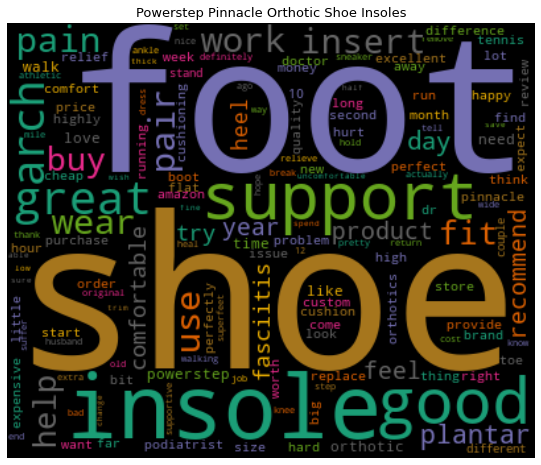

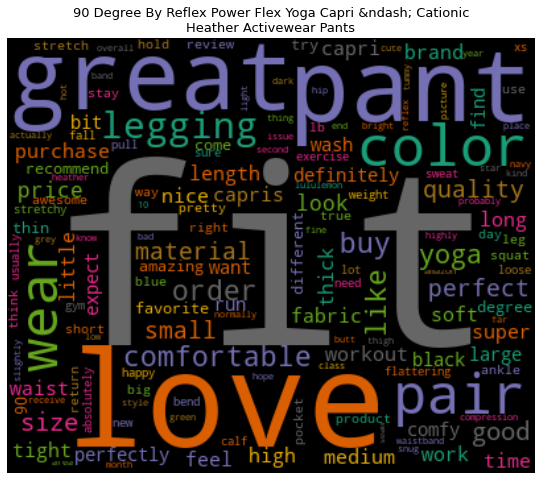

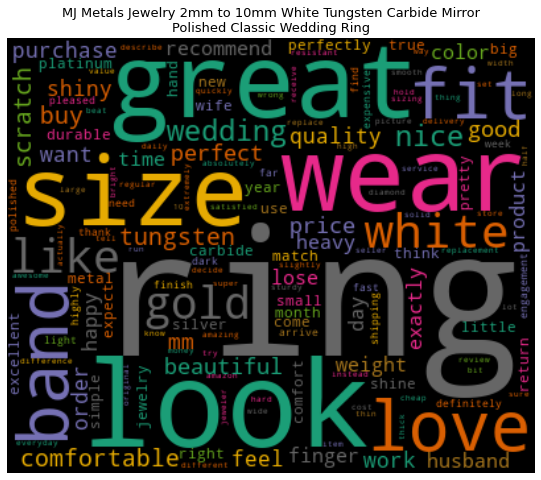

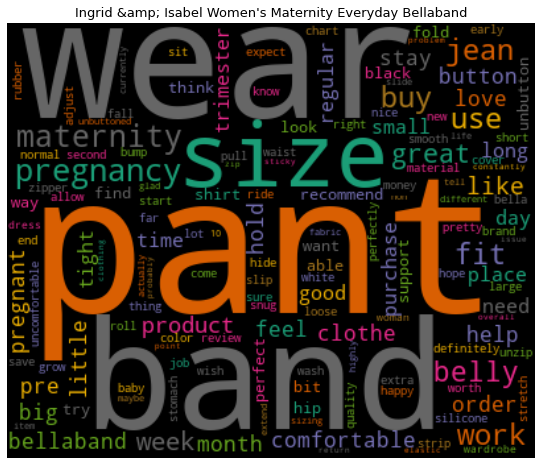

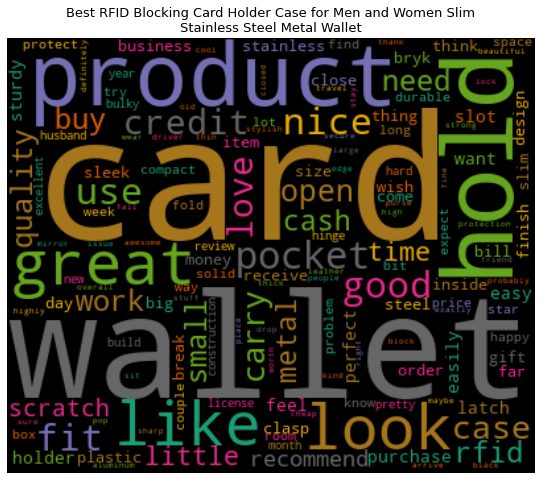

In [143]:
# Plotting word cloud for each product
for product in df_dtm.columns:
    generate_wordcloud(df_dtm[product].sort_values(ascending=False), product)

**Frequencies of Words**

In [144]:
from collections import Counter
counts = Counter(df['removeNo'].explode()).most_common(20)
counts = pd.DataFrame(counts, columns=['word','frequency'])
counts.head()

,word,frequency
0,fit,211514
1,love,204120
2,like,158758
3,look,156866
4,size,155114


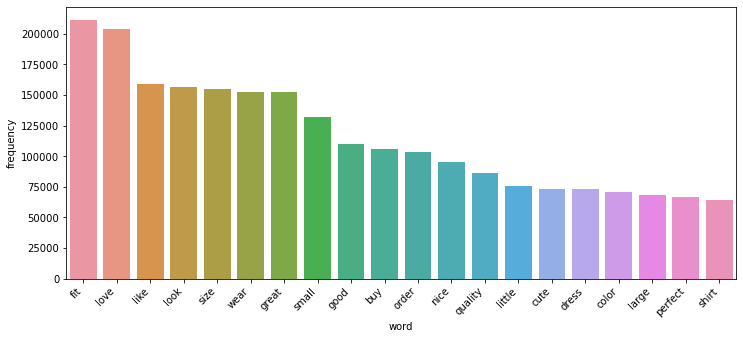

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))
sns.barplot(x='word', y='frequency', data=counts)
plt.xticks(rotation=45, ha='right')
plt.show()

**Review Word Count Distribution**

In [146]:
# add a column for review length to the dataframe
df['reviewLength'] = df['reviewClean_sw'].str.len()
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,reviewClean_sw,noun_adjective,reviewClean,removeNo,reviewLength,sentiment,year
0,5,True,2014-10-20,A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,NaN,NaN,"[exactly, what, i, need, .]",[],"[exactly, need]","[exactly, need]",5,Positive,2014
1,2,True,2014-09-28,A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3.0,NaN,NaN,"[i, agree, with, the, other, review, ,, the, o...","[other, review, opening, small, hook, expensiv...","[agree, review, opening, small, bend, hook, ex...","[agree, review, opening, small, bend, hook, ex...",52,Negative,2014
2,4,False,2014-08-25,A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,NaN,NaN,NaN,"[love, these, ..., i, be, go, to, order, anoth...","[pack, work, someone, back, earring, fish, hoo...","[love, ..., order, pack, work, include, lose, ...","[love, ..., order, pack, work, include, lose, ...",54,Positive,2014
3,2,True,2014-08-24,A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400,NaN,NaN,NaN,"[too, tiny, an, opening]","[tiny, opening]","[tiny, opening]","[tiny, opening]",4,Negative,2014
4,3,False,2014-07-27,A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200,NaN,NaN,NaN,[okay],[],[okay],[okay],1,Neutral,2014


In [147]:
df['reviewLength'].describe()

count    852589.000000
mean         32.629071
std          43.806376
min           1.000000
25%           8.000000
50%          20.000000
75%          40.000000
max        2232.000000
Name: reviewLength, dtype: float64

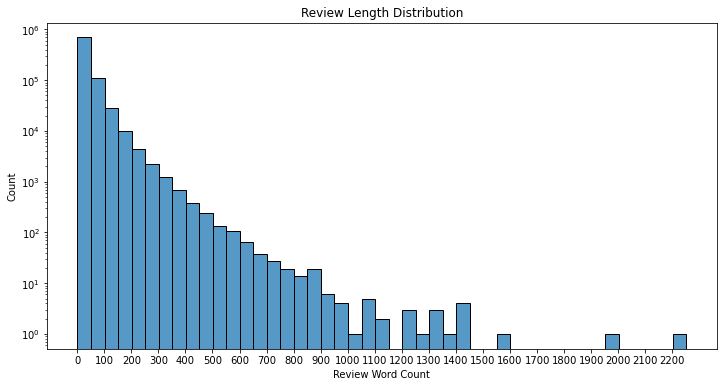

In [148]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='reviewLength', binwidth=50)
plt.yscale('log')
plt.xlabel('Review Word Count')
plt.title('Review Length Distribution')
plt.xticks(range(0,2300,100))
plt.show()

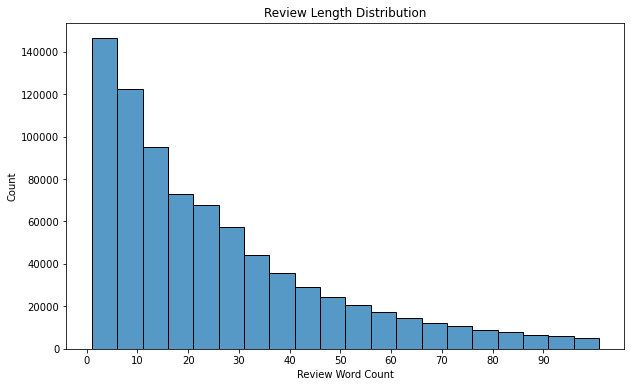

In [149]:
plt.figure(figsize=(10,6))
sns.histplot(data=df[df.reviewLength <= 100], x='reviewLength', binwidth=5)
plt.xlabel('Review Word Count')
plt.title('Review Length Distribution')
plt.xticks(range(0,100,10))
plt.show()

**Review Sentiment Distribution**

In [150]:
# map the reviews positive, neutral, negative according to the rating
df['sentiment'] = df['overall'].map({5: 'Positive', 4: 'Positive', 3: 'Neutral', 2: 'Negative', 1: 'Negative'})
df['reviewTime'] = pd.to_datetime(df['reviewTime'])
df['year'] = df['reviewTime'].dt.year
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,reviewClean_sw,noun_adjective,reviewClean,removeNo,reviewLength,sentiment,year
0,5,True,2014-10-20,A1D4G1SNUZWQOT,7106116521,Tracy,Exactly what I needed.,perfect replacements!!,1413763200,NaN,NaN,NaN,"[exactly, what, i, need, .]",[],"[exactly, need]","[exactly, need]",5,Positive,2014
1,2,True,2014-09-28,A3DDWDH9PX2YX2,7106116521,Sonja Lau,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",1411862400,3.0,NaN,NaN,"[i, agree, with, the, other, review, ,, the, o...","[other, review, opening, small, hook, expensiv...","[agree, review, opening, small, bend, hook, ex...","[agree, review, opening, small, bend, hook, ex...",52,Negative,2014
2,4,False,2014-08-25,A2MWC41EW7XL15,7106116521,Kathleen,Love these... I am going to order another pack...,My New 'Friends' !!,1408924800,NaN,NaN,NaN,"[love, these, ..., i, be, go, to, order, anoth...","[pack, work, someone, back, earring, fish, hoo...","[love, ..., order, pack, work, include, lose, ...","[love, ..., order, pack, work, include, lose, ...",54,Positive,2014
3,2,True,2014-08-24,A2UH2QQ275NV45,7106116521,Jodi Stoner,too tiny an opening,Two Stars,1408838400,NaN,NaN,NaN,"[too, tiny, an, opening]","[tiny, opening]","[tiny, opening]","[tiny, opening]",4,Negative,2014
4,3,False,2014-07-27,A89F3LQADZBS5,7106116521,Alexander D.,Okay,Three Stars,1406419200,NaN,NaN,NaN,[okay],[],[okay],[okay],1,Neutral,2014


In [151]:
def pie_chart(df, year):
    df_year = df[df['year'] == year]
    
    # Declare a figure with a custom size
    fig = plt.figure(figsize=(5, 5))

    # labels for the three classes
    labels = ['Positive', 'Neutral', 'Negative']

    # Sizes for each slide
    sizes = []
    for sentiment in labels:
        if sentiment in df_year['sentiment'].unique():
            sizes.append(df_year['sentiment'].value_counts()[sentiment])
        else:
            sizes.append(0)

    # Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
    plt.pie(sizes, labels=labels, \
            autopct=lambda pct: '{:.2f}%\n({:d} reviews)'.format(pct, int(pct/100*df_year.shape[0])), \
            startangle=90)

    # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.axis('equal')  
    
    # title
    plt.title('{} review sentiment distribution\n'.format(year))
    
    # Display the chart
    plt.show()

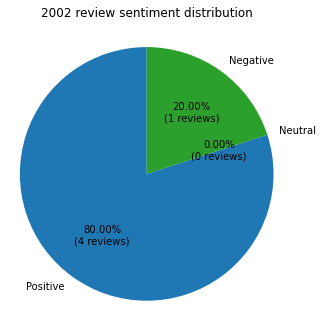

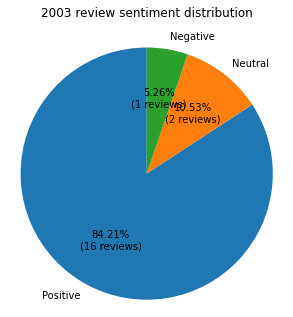

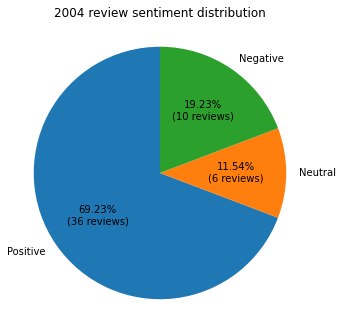

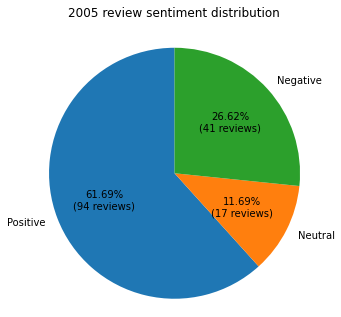

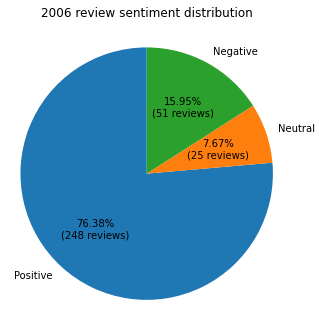

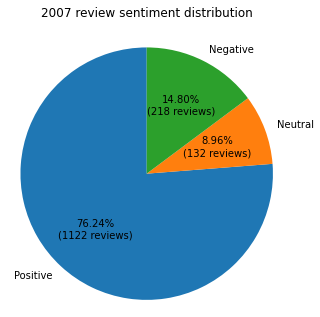

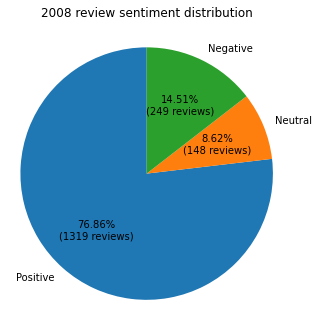

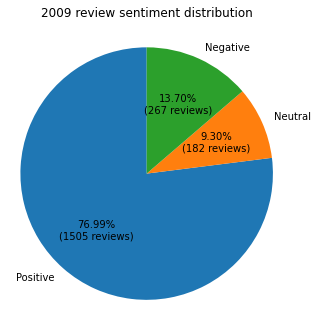

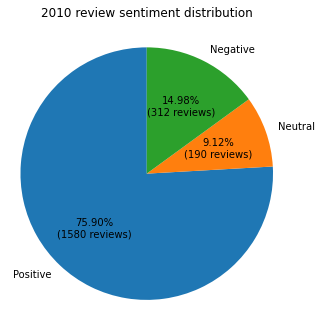

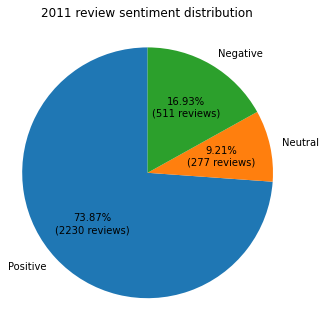

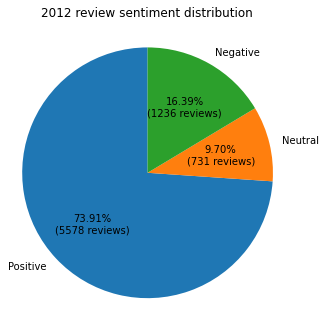

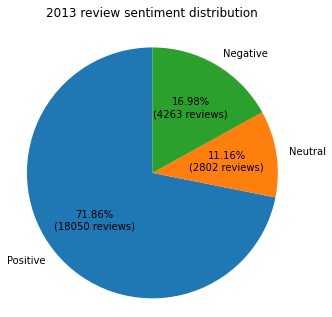

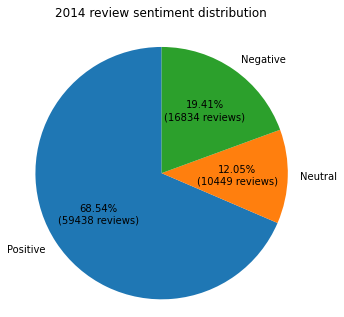

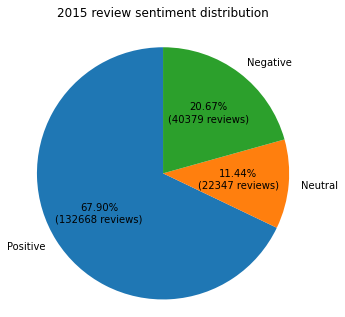

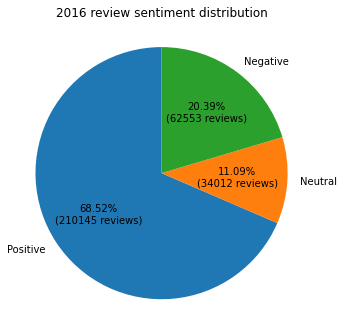

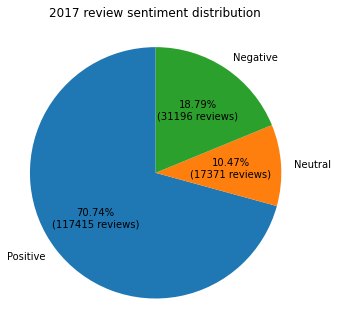

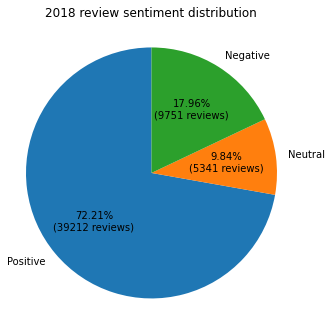

In [152]:
for year in range(2002, 2019):
    pie_chart(df, year)

Bar plots to see trends

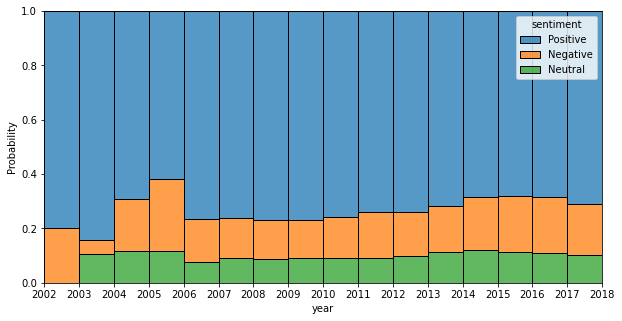

In [153]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='year', hue='sentiment', multiple='fill', binwidth=1, stat='probability')
plt.xticks(range(2002,2019))
plt.show()

In [154]:
# sentiment_perc = df['sentiment'].groupby(df['year']).value_counts(normalize=True).\
#                     rename('percentage').reset_index()

# plt.figure(figsize=(15, 5))
# sns.barplot(x='year', y='percentage', hue='sentiment', data=sentiment_perc)
# plt.show()

<h2>Hypothesis Testing</h2>

From the plots above, we can clearly see that the percentage of positive reviews increased from 62% in 2005 to 76% in 2006. We are interested in testing if the changes in the positive review percentage is due to chance. We will select 5% as the significance level α and use **two proportions z-test**, to test our hypothesis that for each year from 2003 to 2018:

**H<sub>0</sub>**: The positive review percentage in the current year is lower than or equal to the previous year, or p<sub>year</sub> ≤ p<sub>year - 1</sub><br>
**H<sub>1</sub>**: The positive review percentage in the current year is higher the previous year, or p<sub>year</sub> > p<sub>year - 1</sub>

In [155]:
yearly_sentiment = pd.DataFrame(df.groupby(['year']).size().rename('review_count'))
yearly_sentiment['positive_count'] = df[df.sentiment == 'Positive'].groupby(['year']).size()
yearly_sentiment['positive_pct'] = (yearly_sentiment['positive_count'] / yearly_sentiment['review_count']).round(3)

yearly_sentiment

,review_count,positive_count,positive_pct
year,,,
2002,5,4,0.800
2003,19,16,0.842
2004,52,36,0.692
2005,154,95,0.617
2006,326,249,0.764
2007,1473,1123,0.762
2008,1716,1319,0.769
2009,1956,1506,0.770
2010,2083,1581,0.759


In [156]:
from statsmodels.stats.proportion import proportions_ztest

p_value = [None]

for year in range(2002, 2018):
    count = yearly_sentiment.loc[[year+1, year]]['positive_count']
    nobs = yearly_sentiment.loc[[year+1, year]]['review_count']

    stat, pval = proportions_ztest(count, nobs, alternative='larger')
    p_value.append(round(pval, 4))

yearly_sentiment['p_value'] = p_value

yearly_sentiment

,review_count,positive_count,positive_pct,p_value
year,,,,
2002,5,4,0.800,NaN
2003,19,16,0.842,0.4111
2004,52,36,0.692,0.8966
2005,154,95,0.617,0.8358
2006,326,249,0.764,0.0004
2007,1473,1123,0.762,0.5217
2008,1716,1319,0.769,0.3387
2009,1956,1506,0.770,0.4631
2010,2083,1581,0.759,0.7934


In [157]:
def highlight_increase(s):
    return ["color: red" if (v > s.iloc[i-1]) & (i > 0) else '' for i, v in enumerate(s)]

def highlight_p(s):
    return ["background: yellow" if v < 0.05 else "" for v in s]

yearly_sentiment.style.apply(highlight_increase, subset=['positive_pct']).apply(highlight_p, subset=['p_value'])

,review_count,positive_count,positive_pct,p_value
year,,,,
2002,5,4,0.800000,nan
2003,19,16,0.842000,0.411100
2004,52,36,0.692000,0.896600
2005,154,95,0.617000,0.835800
2006,326,249,0.764000,0.000400
2007,1473,1123,0.762000,0.521700
2008,1716,1319,0.769000,0.338700
2009,1956,1506,0.770000,0.463100
2010,2083,1581,0.759000,0.793400


**In year 2006, 2016, 2017 and 2018, the p values from two proportions z tests are statistically significant to reject the null hypothesis. We can conclude that the positive review percentage for these years are higher than their previous years.**

In [158]:
df.to_csv('data_wrangling.csv',index=False)